In [104]:
# Import necessary libraries

import tensorflow as tf
from tensorflow.keras.layers import Conv2D, UpSampling2D, InputLayer, Conv2DTranspose, Activation, Dense, Dropout, Flatten, BatchNormalization,Reshape

from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.image import  array_to_img, img_to_array, load_img

from skimage.color import rgb2lab, lab2rgb, rgb2gray

import numpy as np
import os
import random
import matplotlib.pyplot as plt
import cv2 as cv
from google.colab.patches import cv2_imshow

In [4]:
# Use helper function to preprocess image

image = img_to_array(load_img('pp200.jpg'))

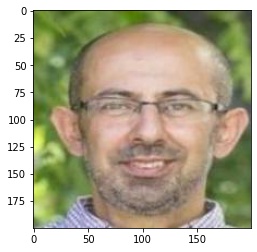

In [5]:
# Display image of Pavlos

plt.imshow(image/255)

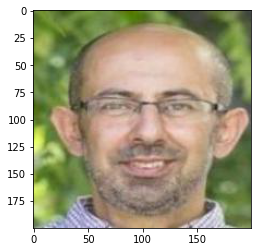

In [9]:
plt.imshow(image.astype('uint8'))

In [10]:
# Use the helper code below to convert RGB image into L*a*b image
# Find more information on rgb2lab https://www.mathworks.com/help/images/ref/rgb2lab.html

# X will be the first channel of the L*a*b image 
X = rgb2lab(1.0/255*image)[:,:,0]

# Y will be the subsequent *color* channels of the L*a*b image 
Y = rgb2lab(1.0/255*image)[:,:,1:]

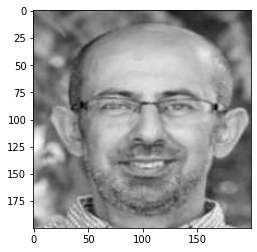

In [13]:
# X must only be the a grayscale version

plt.imshow(X, cmap = 'gray')

In [17]:
Y.shape

(200, 200, 2)

In [58]:
encoder=Sequential()
encoder.add(Conv2D(8,kernel_size=3,strides=2,padding='same',input_shape=[200,200,1]))
encoder.add(Conv2D(8,kernel_size=3,strides=1,padding='same'))
encoder.add(Conv2D(16,kernel_size=3,strides=1,padding='same'))
encoder.add(Conv2D(16,kernel_size=3,strides=2,padding='same'))
encoder.add(Conv2D(32,kernel_size=3,strides=1,padding='same'))
encoder.add(Conv2D(32,kernel_size=3,strides=2,padding='same'))
decoder=Sequential()
decoder.add(UpSampling2D(size=2,input_shape=[25,25,32]))
decoder.add(Conv2D(32,kernel_size=3,strides=1,padding='same'))
decoder.add(UpSampling2D(size=2))
decoder.add(Conv2D(16,kernel_size=3,strides=1,padding='same'))
decoder.add(UpSampling2D(size=2))
decoder.add(Conv2D(2,kernel_size=3,strides=1,padding='same'))

In [59]:
encoder.summary()

Model: "sequential_17"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_58 (Conv2D)           (None, 100, 100, 8)       80        
_________________________________________________________________
conv2d_59 (Conv2D)           (None, 100, 100, 8)       584       
_________________________________________________________________
conv2d_60 (Conv2D)           (None, 100, 100, 16)      1168      
_________________________________________________________________
conv2d_61 (Conv2D)           (None, 50, 50, 16)        2320      
_________________________________________________________________
conv2d_62 (Conv2D)           (None, 50, 50, 32)        4640      
_________________________________________________________________
conv2d_63 (Conv2D)           (None, 25, 25, 32)        9248      
Total params: 18,040
Trainable params: 18,040
Non-trainable params: 0
_________________________________________________

In [60]:
decoder.summary()

Model: "sequential_18"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
up_sampling2d_7 (UpSampling2 (None, 50, 50, 32)        0         
_________________________________________________________________
conv2d_64 (Conv2D)           (None, 50, 50, 32)        9248      
_________________________________________________________________
up_sampling2d_8 (UpSampling2 (None, 100, 100, 32)      0         
_________________________________________________________________
conv2d_65 (Conv2D)           (None, 100, 100, 16)      4624      
_________________________________________________________________
up_sampling2d_9 (UpSampling2 (None, 200, 200, 16)      0         
_________________________________________________________________
conv2d_66 (Conv2D)           (None, 200, 200, 2)       290       
Total params: 14,162
Trainable params: 14,162
Non-trainable params: 0
_________________________________________________

In [61]:
ae=Sequential([encoder,decoder])
ae.summary()

Model: "sequential_19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
sequential_17 (Sequential)   (None, 25, 25, 32)        18040     
_________________________________________________________________
sequential_18 (Sequential)   (None, 200, 200, 2)       14162     
Total params: 32,202
Trainable params: 32,202
Non-trainable params: 0
_________________________________________________________________


In [62]:
ae.compile(loss='MSE',optimizer=tf.keras.optimizers.Adam(lr=0.001))

In [112]:
ae.fit(np.expand_dims(X,axis=[0,3]),np.expand_dims(Y,axis=0),batch_size=1,initial_epoch=900,epochs=1000)

Epoch 901/1000
1/1 [==============================] - 0s 4ms/step - loss: 49.8352
Epoch 902/1000
1/1 [==============================] - 0s 2ms/step - loss: 49.8064
Epoch 903/1000
1/1 [==============================] - 0s 1ms/step - loss: 49.9643
Epoch 904/1000
1/1 [==============================] - 0s 2ms/step - loss: 51.0905
Epoch 905/1000
1/1 [==============================] - 0s 732us/step - loss: 57.4739
Epoch 906/1000
1/1 [==============================] - 0s 1ms/step - loss: 90.5009
Epoch 907/1000
1/1 [==============================] - 0s 2ms/step - loss: 208.0719
Epoch 908/1000
1/1 [==============================] - 0s 2ms/step - loss: 178.6708
Epoch 909/1000
1/1 [==============================] - 0s 2ms/step - loss: 66.9271
Epoch 910/1000
1/1 [==============================] - 0s 3ms/step - loss: 109.0305
Epoch 911/1000
1/1 [==============================] - 0s 1ms/step - loss: 94.1767
Epoch 912/1000
1/1 [==============================] - 0s 3ms/step - loss: 68.1679
Epoch 913/1

In [113]:
Y_pred=ae.predict(np.expand_dims(X,axis=[0,3]))

In [114]:
lab_pred=np.append(np.expand_dims(X,axis=2),Y_pred[0],axis=2)

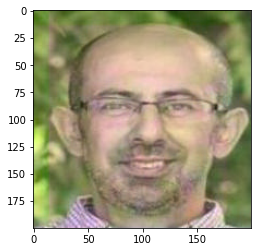

In [115]:
rgb_pred=lab2rgb(lab_pred)
plt.imshow(rgb_pred)

In [116]:
cv.imwrite('Pavlos_colored.jpg',rgb_pred*255.)

True

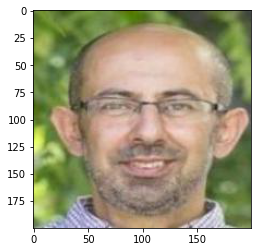

In [86]:
plt.imshow(image.astype('uint8'))